In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score,recall_score,precision_score,f1_score
from sklearn.tree import DecisionTreeClassifier

In [135]:
data=pd.read_csv(r'C:\Users\HP\Documents\NareshIT\Loan Prediction analytics vidya\DataFiles\train_ctrUa4K.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [136]:
cat=data.select_dtypes(include='object').columns
num=data.select_dtypes(exclude='object').columns

# Data Quick Check

In [137]:
data['Dependents']=data['Dependents'].replace('3+',3)

In [138]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [139]:
data.shape

(614, 13)

In [140]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [141]:
data.tail(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [145]:
data['Dependents']=data['Dependents'].astype(int)

In [146]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int32
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [147]:
data.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.744300,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,1.009623,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


# Missing Value analysis

# data.isnull().sum()

- in the data we have some missing values 

- we are not remove any data in the dataset 

- filling the categorical column null values with mode and numerical column with median value


    - Gender               13
    - Married               3
    - Dependents           15
    - Self_Employed        32
    - LoanAmount           22
    - Loan_Amount_Term     14
    - Credit_History       50

In [148]:
missing_value_list=['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term']
for col in missing_value_list:
    data[col].fillna(data[col].mode()[0],inplace=True)

In [149]:
import warnings
warnings.filterwarnings('ignore')
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

In [150]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### After filling the null values we dont have null values in our data 

In [151]:
for i in cat[1:]:
    keys=data[i].value_counts().keys()
    values=data[i].value_counts().values
    df=pd.DataFrame(zip(keys,values),columns=[i,'No. of Customers'])
    print(df)
    print('=========================================')

   Gender  No. of Customers
0    Male               502
1  Female               112
  Married  No. of Customers
0     Yes               401
1      No               213
   Dependents  No. of Customers
0           0               360
1           1               102
2           2               101
3           3                51
      Education  No. of Customers
0      Graduate               480
1  Not Graduate               134
  Self_Employed  No. of Customers
0            No               532
1           Yes                82
  Property_Area  No. of Customers
0     Semiurban               233
1         Urban               202
2         Rural               179
  Loan_Status  No. of Customers
0           Y               422
1           N               192


# Outlier Analysis

In [152]:
# outlier data
LoanAmount_df=data['ApplicantIncome']
q1=np.percentile(LoanAmount_df,25)
q3=np.percentile(LoanAmount_df,75)
iqr=q3-q1
con1=q1-1.5*iqr > LoanAmount_df
con2=q3+1.5*iqr < LoanAmount_df
con=con1|con2
outlier_data=data[con]
len(outlier_data)

50

In [153]:
# outlier data
LoanAmount_df=data['CoapplicantIncome']
q1=np.percentile(LoanAmount_df,25)
q3=np.percentile(LoanAmount_df,75)
iqr=q3-q1
con1=q1-1.5*iqr > LoanAmount_df
con2=q3+1.5*iqr < LoanAmount_df
con=con1|con2
outlier_data=data[con]
len(outlier_data)

18

In [154]:
# wage_data=visa_df['prevailing_wage']
LoanAmount_df=data['LoanAmount']
q1=np.percentile(LoanAmount_df,25)
q3=np.percentile(LoanAmount_df,75)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr

In [155]:

LoanAmount_df=data['LoanAmount']

LoanAmount_median=data['LoanAmount'].median()
con=(LoanAmount_df<lb)| (LoanAmount_df>ub)
true=LoanAmount_median
false=LoanAmount_df
data['LoanAmount']=np.where(con,true,false)

In [156]:

ApplicantIncome_df=data['ApplicantIncome']

ApplicantIncome_median=data['ApplicantIncome'].median()
con=(ApplicantIncome_df<lb)| (ApplicantIncome_df>ub)
true=ApplicantIncome_median
false=ApplicantIncome_df
data['ApplicantIncome']=np.where(con,true,false)

In [157]:

CoapplicantIncome_df=data['CoapplicantIncome']

CoapplicantIncome_median=data['CoapplicantIncome'].mean()
con=(CoapplicantIncome_df<lb)| (CoapplicantIncome_df>ub)
true=CoapplicantIncome_median
false=CoapplicantIncome_df
data['CoapplicantIncome']=np.where(con,true,false)

{'whiskers': [<matplotlib.lines.Line2D at 0x22fd421bd70>,
 'caps': [<matplotlib.lines.Line2D at 0x22fd42703b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22fd4218fb0>],
 'medians': [<matplotlib.lines.Line2D at 0x22fd4270950>],
 'fliers': [<matplotlib.lines.Line2D at 0x22fd4270c50>],
 'means': []}

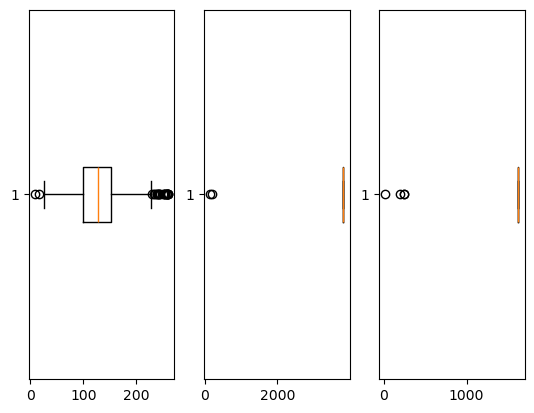

In [158]:
plt.subplot(1,3,1).boxplot(data['LoanAmount'],vert=False)
plt.subplot(1,3,2).boxplot(data['ApplicantIncome'],vert=False)
plt.subplot(1,3,3).boxplot(data['CoapplicantIncome'],vert=False)

In [159]:
data.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.744300,3800.667752,1611.803024,128.451140,342.410423,0.855049
std,1.009623,207.155643,116.942896,44.799645,64.428629,0.352339
min,0.000000,150.000000,16.120001,9.000000,12.000000,0.000000
25%,0.000000,3812.500000,1621.245798,100.250000,360.000000,1.000000
50%,0.000000,3812.500000,1621.245798,128.000000,360.000000,1.000000
75%,1.000000,3812.500000,1621.245798,152.000000,360.000000,1.000000
max,3.000000,3812.500000,1621.245798,260.000000,480.000000,1.000000


In [160]:
data['LoanAmount'].max()

260.0

# Encoding 

In [161]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status', 'Dependents']
for col in cols:
    data[col] = le.fit_transform(data[col])
    data1=data

In [162]:
cat

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [163]:
data1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,3812.5,1621.245798,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,3812.5,1621.245798,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3812.5,1621.245798,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,3812.5,1621.245798,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,3812.5,1621.245798,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,3812.5,1621.245798,71.0,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,3812.5,1621.245798,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,3812.5,240.000000,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,3812.5,1621.245798,187.0,360.0,1.0,2,1


# Scaling 

In [189]:
data.drop('Loan_ID',axis=1,inplace=True)

In [165]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

data2 = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [166]:
data2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.057164,0.080813,-0.010078,0.273231,0.411733,1.223298
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,0.057164,0.080813,-0.010078,0.273231,0.411733,-1.318513
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,0.057164,0.080813,-1.395146,0.273231,0.411733,1.223298
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,0.057164,0.080813,-0.188797,0.273231,0.411733,1.223298
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.057164,0.080813,0.280339,0.273231,0.411733,1.223298
...,...,...,...,...,...,...,...,...,...,...,...
609,-2.117107,-1.372089,-0.737806,-0.528362,-0.392601,0.057164,0.080813,-1.283447,0.273231,0.411733,-1.318513
610,0.472343,0.728816,2.236021,-0.528362,-0.392601,0.057164,0.080813,-1.975981,-2.522836,0.411733,-1.318513
611,0.472343,0.728816,0.253470,-0.528362,-0.392601,0.057164,-11.740102,2.782397,0.273231,0.411733,1.223298
612,0.472343,0.728816,1.244745,-0.528362,-0.392601,0.057164,0.080813,1.307970,0.273231,0.411733,1.223298


In [167]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
pca.fit(X)

PCA(n_components=10)

In [168]:
data3=pca.transform(X)

In [169]:
len(data3[0]),len(data3)

(10, 614)

In [170]:
data3

array([[ 1.17007395e+01,  9.17743070e+00,  1.76803793e+01, ...,
        -9.07585758e-02,  1.57390880e-01, -1.63963222e-01],
       [ 1.17002786e+01,  9.17658112e+00,  1.76801482e+01, ...,
        -3.29377941e-01,  5.56848251e-02, -1.37951667e-01],
       [ 1.14899474e+01,  9.81044555e+00,  1.12155907e+01, ...,
        -2.90707771e-01,  9.71008439e-02,  9.60481744e-01],
       ...,
       [ 1.73883918e+01, -1.37304524e+03,  4.83777427e+00, ...,
        -1.31449005e-02, -3.59585979e-03, -6.54482608e-02],
       [ 1.19010490e+01,  8.57369254e+00,  2.38278623e+01, ...,
        -1.53688548e-01,  1.23706747e-01, -1.85024489e-01],
       [ 1.17175742e+01,  9.12662538e+00,  1.82029348e+01, ...,
         3.56392904e-02, -8.21381108e-01,  8.95820330e-01]])

In [171]:
X1=data1.drop('Loan_Status',axis=1)
y1=data['Loan_Status']

X2=data2
y2=data['Loan_Status']

X3=data3
y3=data['Loan_Status']

In [172]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)          # data1
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)      # data2
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)  

In [173]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier().fit(X_train1, y_train1)
model2 = RandomForestClassifier().fit(X_train2, y_train2)
model3 = RandomForestClassifier().fit(X_train3, y_train3)


In [174]:
y_pred1 = model1.predict(X_test1)
y_pred2 = model2.predict(X_test2)
y_pred3 = model3.predict(X_test3)


In [175]:
from sklearn.metrics import accuracy_score, classification_report

print("Data1 Accuracy:", accuracy_score(y_test1, y_pred1))
print("Data2 Accuracy:", accuracy_score(y_test2, y_pred2))
print("Data3 Accuracy:", accuracy_score(y_test3, y_pred3))


Data1 Accuracy: 0.7479674796747967
Data2 Accuracy: 0.7398373983739838
Data3 Accuracy: 0.7560975609756098


In [176]:

model7 = LogisticRegression().fit(X_train1, y_train1)
model8 = LogisticRegression().fit(X_train2, y_train2)
model9 = LogisticRegression().fit(X_train3, y_train3)

In [177]:
y_pred1 = model7.predict(X_test1)
y_pred2 = model8.predict(X_test2)
y_pred3 = model9.predict(X_test3)


In [178]:
from sklearn.metrics import accuracy_score, classification_report

print("Data1 Accuracy:", accuracy_score(y_test1, y_pred1))
print("Data2 Accuracy:", accuracy_score(y_test2, y_pred2))
print("Data3 Accuracy:", accuracy_score(y_test3, y_pred3))


Data1 Accuracy: 0.7886178861788617
Data2 Accuracy: 0.7886178861788617
Data3 Accuracy: 0.7886178861788617


In [179]:
model1 = DecisionTreeClassifier().fit(X_train1, y_train1)
model2 = DecisionTreeClassifier().fit(X_train2, y_train2)
model3 = DecisionTreeClassifier().fit(X_train3, y_train3)

In [180]:
y_pred1 = model1.predict(X_test1)
y_pred2 = model2.predict(X_test2)
y_pred3 = model3.predict(X_test3)


In [181]:
print("Data1 Accuracy:", accuracy_score(y_test1, y_pred1))
print("Data2 Accuracy:", accuracy_score(y_test2, y_pred2))
print("Data3 Accuracy:", accuracy_score(y_test3, y_pred3))

Data1 Accuracy: 0.6260162601626016
Data2 Accuracy: 0.6504065040650406
Data3 Accuracy: 0.6910569105691057


In [182]:
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier().fit(X_train1, y_train1)
model2 = KNeighborsClassifier().fit(X_train2, y_train2)
model3 = KNeighborsClassifier().fit(X_train3, y_train3)

In [183]:
y_pred1 = model1.predict(X_test1)
y_pred2 = model2.predict(X_test2)
y_pred3 = model3.predict(X_test3)


In [184]:
print("Data1 Accuracy:", accuracy_score(y_test1, y_pred1))
print("Data2 Accuracy:", accuracy_score(y_test2, y_pred2))
print("Data3 Accuracy:", accuracy_score(y_test3, y_pred3))

Data1 Accuracy: 0.5528455284552846
Data2 Accuracy: 0.7723577235772358
Data3 Accuracy: 0.5609756097560976


In [185]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
params = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500]
}

# Create GridSearchCV
grid = GridSearchCV(LogisticRegression(), param_grid=params, cv=5, scoring='accuracy')

# Fit the model
grid.fit(X_train2, y_train2)

# Best model
best_modellr = grid.best_estimator_
print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)


Best Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy: 0.8145949288806431


In [186]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Create GridSearchCV
grid = GridSearchCV(KNeighborsClassifier(), param_grid=params, cv=5, scoring='accuracy')

# Fit the model
grid.fit(X_train2, y_train2)

# Best model
best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Best Accuracy: 0.8084518655947226


In [187]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Create GridSearchCV
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=params, cv=5, scoring='accuracy')

# Fit the model
grid.fit(X_train2, y_train2)

# Best model
best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)


Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Accuracy: 0.7982477839620696


In [188]:
import joblib
joblib.dump(best_modellr, "loan_model.pkl")


['loan_model.pkl']

In [193]:
print(y_train3.value_counts())

Loan_Status
1    342
0    149
Name: count, dtype: int64
